### Imports
Import libraries and write settings here.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import train_test_split

import graphviz
import pydotplus
import io
import scipy.misc
from matplotlib.pyplot import imread
sb.set(style='ticks')
rcParams['figure.figsize'] = 5,5
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
train_df = pd.read_csv("data.csv")

In [10]:
train_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
train,test=train_test_split(train_df,test_size=0.15)

In [8]:
train.shape

(1714, 17)

In [11]:
pos_tempo = train_df [train_df['target']==1]['tempo']

In [15]:
neg_tempo = train_df [train_df['target']==0]['tempo']

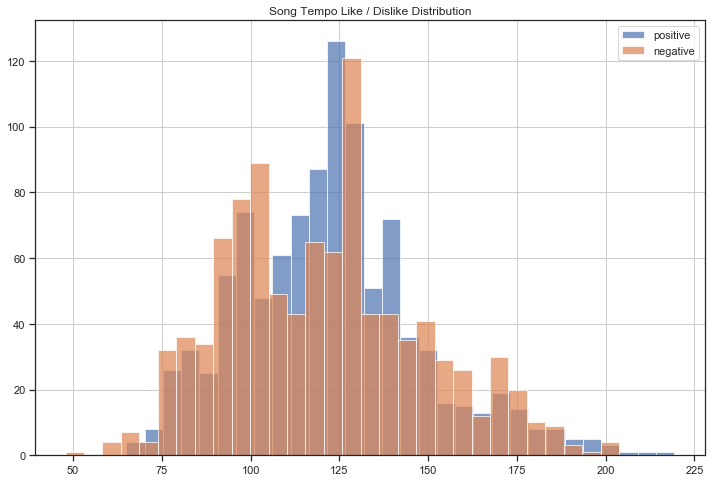

In [14]:
fig = plt.figure(figsize=(12,8))
plt.title("Song Tempo Like / Dislike Distribution")
pos_tempo.hist(alpha=0.7,bins=30,label='positive')
neg_tempo.hist(alpha=0.7,bins=30,label='negative')
plt.legend(loc="upper right")

In [16]:
c=DecisionTreeClassifier(min_samples_split=100)

In [17]:
features=["acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","time_signature","valence"
]

In [18]:
x_train=train[features]
y_train=train['target']

x_test=train[features]
y_test=train['target']

In [19]:
dt = c.fit(x_train,y_train)

In [20]:
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)

    #read image from a file as an array   
    img = scipy.misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)


In [21]:
scipy.misc.imread

<function numpy.lib.utils._Deprecate.__call__.<locals>.newfunc(*args, **kwds)>

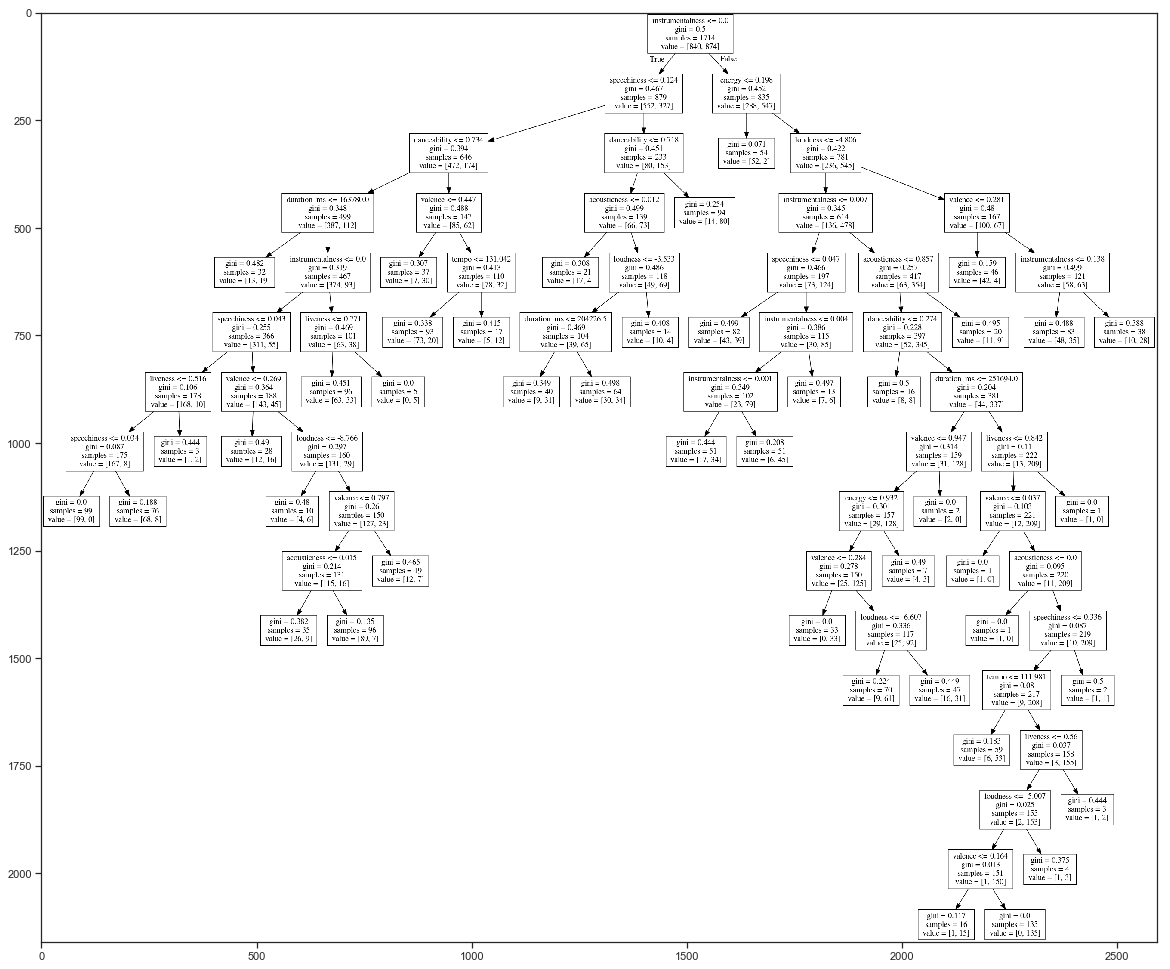

In [26]:
show_tree(dt,features,'kojo.png')

In [24]:
y_pred =c.predict(x_test)

In [25]:
y_pred

array([0, 1, 0, ..., 1, 1, 1])